<a href="https://colab.research.google.com/github/billiahkerubo1/Week9-Independent-Project/blob/main/TITANIC_CLASSIFICATION_WEEK9IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC CLASSIFICATION**

# Defining the question

The question is to determine whether a person survivd the titanic given variables like age and passenger class. Classification of whether one survived or not will be determined by the kKearestNeighbors algorithm.

# Specifying the question

Did the passenger survive or not, given their age and passenger class.

# Defining the metrics of success

The metrics of success are the confusion matrix and the classification report. F1 score should be close to 1, while the confusion matrix should have a higher number of correct classifications than the wrong classifications.

# Understanding the context

The titanic dataset contains a list of passengers with their details.The details include where they embarked, their age as well as their passenger classes. An analysis is conducted to determine whether a passenger survived or not. The algorithm to be used is the kNearestNeighbor. A model will be trained to classify the survived and the ones that did not survive. After that, the model will be evaluated to measure how accurate the predictions are made. If the accuracy score is more than 80%, then it is a good model.

# Recording the Experimental Design

1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5.Challenging the solution: The solution was challenged through the hyperparameter tuning to see whether the accuracy improved.

# 1. Importing Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading and understanding the data

In [53]:
test_df = pd.read_csv('/content/test (1).csv')

train_df = pd.read_csv('/content/train (5).csv')

In [54]:
# previewing the first test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
#previewing the last test records
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [56]:
#previewing the first train records
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#previewing the last train records
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
#checking the size of the train records
train_df.shape

(891, 12)

The train dataset has 891 rows and 12 columns

In [59]:
#checking the size of test records
test_df.shape

(418, 11)

The test dataset has 418 rows and 11 columns.

In [60]:
#checking for null values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [61]:
# make a copy of the dataframe to work with
train_df2 = train_df.copy()
test_df2 = test_df.copy()

In [62]:
# Procedure 1: fill missing values with the column mean
train_df2['Age']=train_df2['Age'].fillna(train_df2['Age'].mean())
train_df2['Embarked'] = train_df2['Embarked'].fillna(train_df2['Embarked'].mode())

test_df2['Age'] = test_df2['Age'].fillna(test_df2['Age'].mean())
test_df2['Fare'] = test_df2['Fare'].fillna(test_df2['Fare'].mean())

In [63]:
# Procedure 2: Drop missing values
#since the cabin column has many mising values, we will drop the column
train_df2.drop('Cabin', axis = 1, inplace = True)
test_df2.drop('Cabin', axis = 1, inplace = True)

In [64]:
# Dropping the unimportant columns
train_df2.drop(['PassengerId', 'Name'], axis = 1, inplace = True)
test_df2.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [65]:
train_df2.drop('Ticket', axis = 1, inplace = True)

In [66]:
#checking whether there are still any missing values
train_df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [67]:
train_df2.dropna(inplace=True)
train_df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

The null values have been dropped.

In [68]:
test_df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

The null values have been dropped.

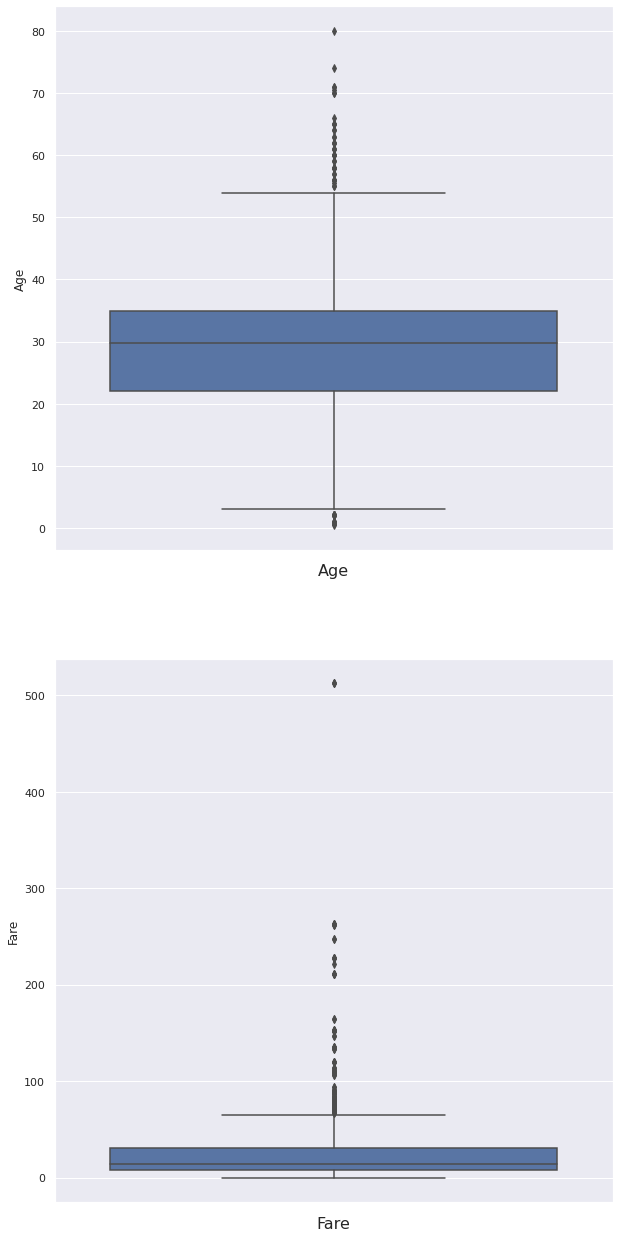

In [69]:
#checking for outliers

columns = ['Age','Fare']
fig, ax = plt.subplots(len(columns), figsize=(10,22))

for i, col_val in enumerate(columns):

    sns.boxplot(y=train_df2[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=16);

plt.show();

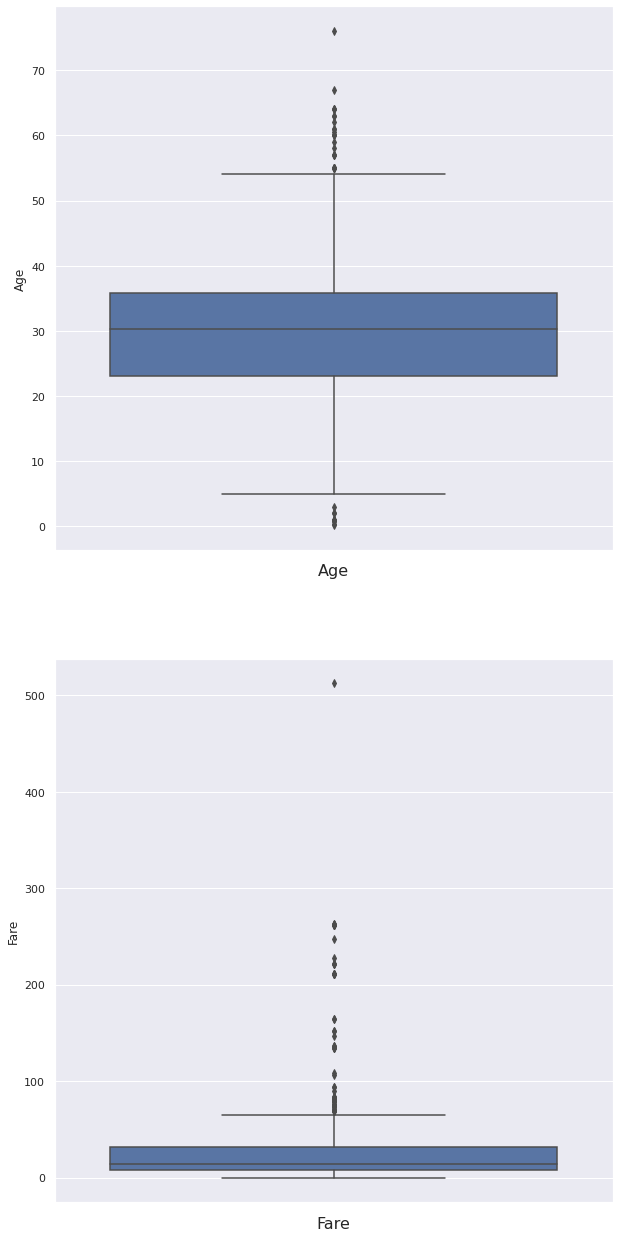

In [70]:
# outliers for test data
fig, ax = plt.subplots(len(columns), figsize=(10,22))

for i, col_val in enumerate(columns):

    sns.boxplot(y=test_df2[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=16);

plt.show();

The outiers will not be dropped because they contain real values important for our analysis.

In [71]:
# checking for duplicates
train_df2.duplicated().sum()

111

There are 15 duplicates which have to be dropped.

In [72]:
train_df2.drop_duplicates(inplace = True)
train_df2.duplicated().sum()

0

The duplicate values have been dropped.

In [73]:
#checking for duplicates on test data
test_df2.duplicated().sum()

1

In [74]:
test_df2.drop_duplicates(inplace = True)
test_df2.duplicated().sum()

0

The duplicate value has been dropped.

In [75]:
# Checking for information
print(train_df2.info())
print(test_df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  778 non-null    int64  
 1   Pclass    778 non-null    int64  
 2   Sex       778 non-null    object 
 3   Age       778 non-null    float64
 4   SibSp     778 non-null    int64  
 5   Parch     778 non-null    int64  
 6   Fare      778 non-null    float64
 7   Embarked  778 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Ticket    417 non-null    object 
 6   Fare      417 non

In [76]:
#checking for unique values
print(train_df2.nunique())
print(test_df2.nunique())

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        247
Embarked      3
dtype: int64
Pclass        3
Sex           2
Age          80
SibSp         7
Parch         8
Ticket      363
Fare        170
Embarked      3
dtype: int64


# 3. Exploratory Data Analysis

## a. Univariate Analysis

In [77]:
# Getting statistical summaries
train_df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,0.411311,2.249357,29.745666,0.526992,0.419023,34.712987
std,0.492388,0.853206,13.674550,0.988956,0.839346,52.280326
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.250000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.890600
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
test_df2.describe()

,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2.263789,30.272590,0.443645,0.393285,35.660637
std,0.842077,12.649711,0.894596,0.982419,55.903384
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,36.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [79]:
#  checking for mean, standard deviation, variance, skewness and kurtosis
for column in columns:
  print('\n')
  print(column + ',Mean: ' + str(train_df2[column].mean()))
  print(column + ', Standard deviation: '+ str(train_df2[column].std()))
  print(column + ', Variance: '+ str(train_df2[column].var()))
  print(column + ', Skewness: '+ str(train_df2[column].skew()))
  print(column + ', Kurtosis: '+ str(train_df2[column].kurt()))



Age,Mean: 29.745666112203203
Age, Standard deviation: 13.67454970775624
Age, Variance: 186.9933097098963
Age, Skewness: 0.39572787881653304
Age, Kurtosis: 0.5889607303622988


Fare,Mean: 34.71298701799485
Fare, Standard deviation: 52.28032556629783
Fare, Variance: 2733.2324413180945
Fare, Skewness: 4.573366607470178
Fare, Kurtosis: 30.157424264662524


The fare column is not normally distributed, as indicated by the skewness.

In [80]:
#  checking for mean, standard deviation, variance, skewness and kurtosis
for column in columns:
  print('\n')
  print(column + ',Mean: ' + str(test_df2[column].mean()))
  print(column + ', Standard deviation: '+ str(test_df2[column].std()))
  print(column + ', Variance: '+ str(test_df2[column].var()))
  print(column + ', Skewness: '+ str(test_df2[column].skew()))
  print(column + ', Kurtosis: '+ str(test_df2[column].kurt()))



Age,Mean: 30.27259036144581
Age, Standard deviation: 12.649710791415902
Age, Variance: 160.01518310646395
Age, Skewness: 0.5121013070560888
Age, Kurtosis: 0.8738942497765603


Fare,Mean: 35.660636902851785
Fare, Standard deviation: 55.90338355823841
Fare, Variance: 3125.188293259521
Fare, Skewness: 3.6862768562096377
Fare, Kurtosis: 17.918959529961725


The fare column is not normally distributed.

In [81]:
# Interquantile range

for column in columns:
  print('\n')
  print(test_df2[column].quantile([0.25, 0.5, 0.75]))
  print(train_df2[column].quantile([0.25, 0.5, 0.75]))



0.25    23.00000
0.50    30.27259
0.75    36.00000
Name: Age, dtype: float64
0.25    21.250000
0.50    29.699118
0.75    36.000000
Name: Age, dtype: float64


0.25     7.8958
0.50    14.4542
0.75    31.5000
Name: Fare, dtype: float64
0.25     8.0500
0.50    15.9000
0.75    33.8906
Name: Fare, dtype: float64


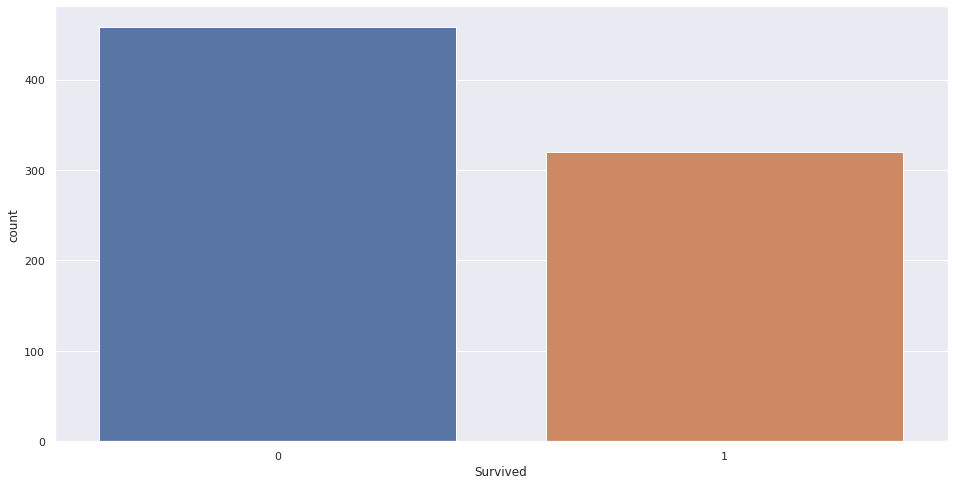

In [82]:
#Univariate analysis target.
sns.countplot(train_df2['Survived'])

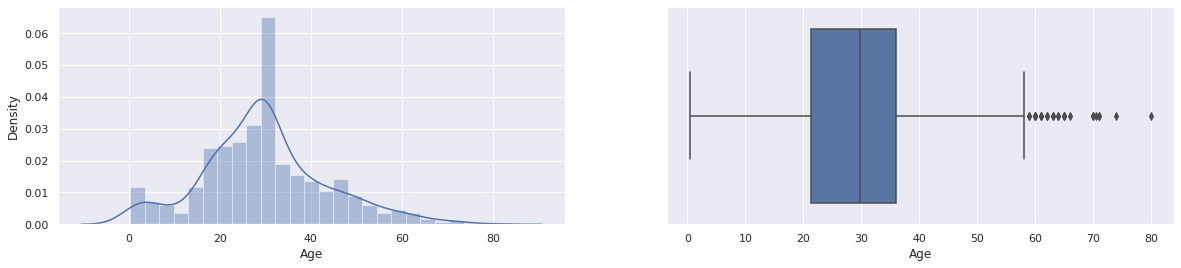

In [83]:
#Univariate analysis age.

f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(train_df2['Age'])

f.add_subplot(1,2,2)
sns.boxplot(train_df2['Age'])

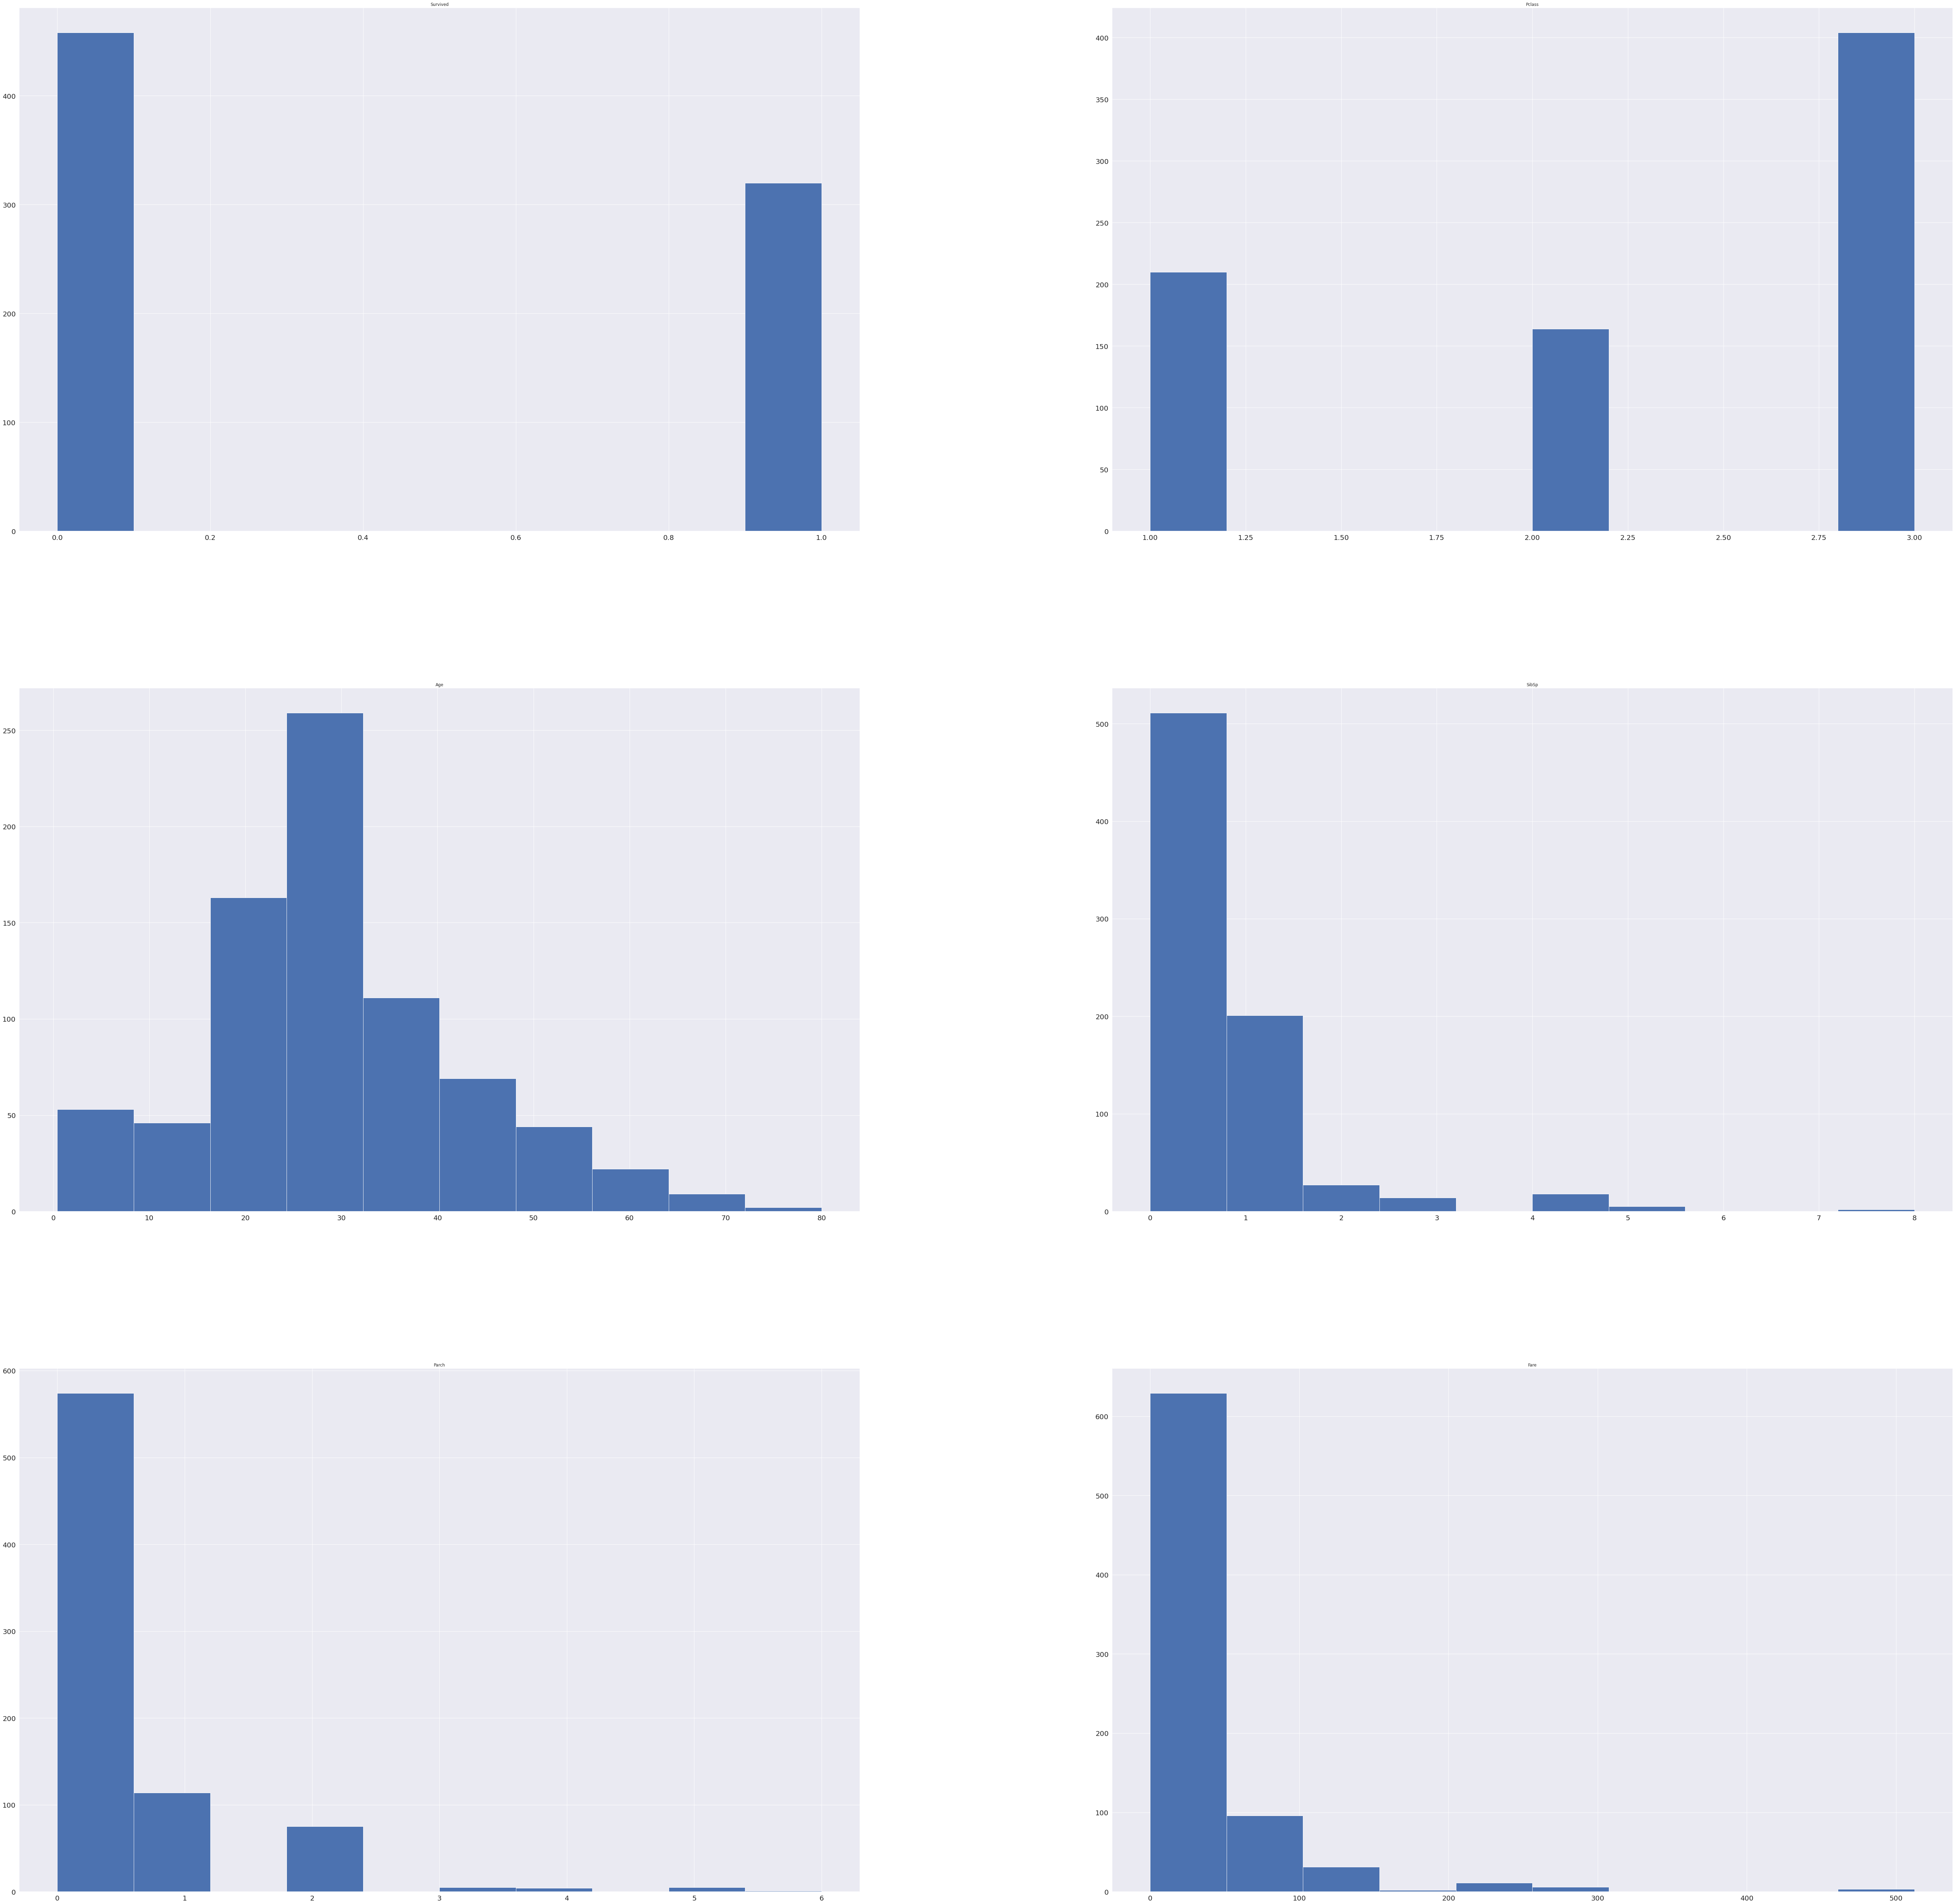

In [84]:
# histograms to show distributions
train_df2.hist(figsize=(100,100), sharex=False, sharey=False, xlabelsize= 20, ylabelsize=20)
plt.show()

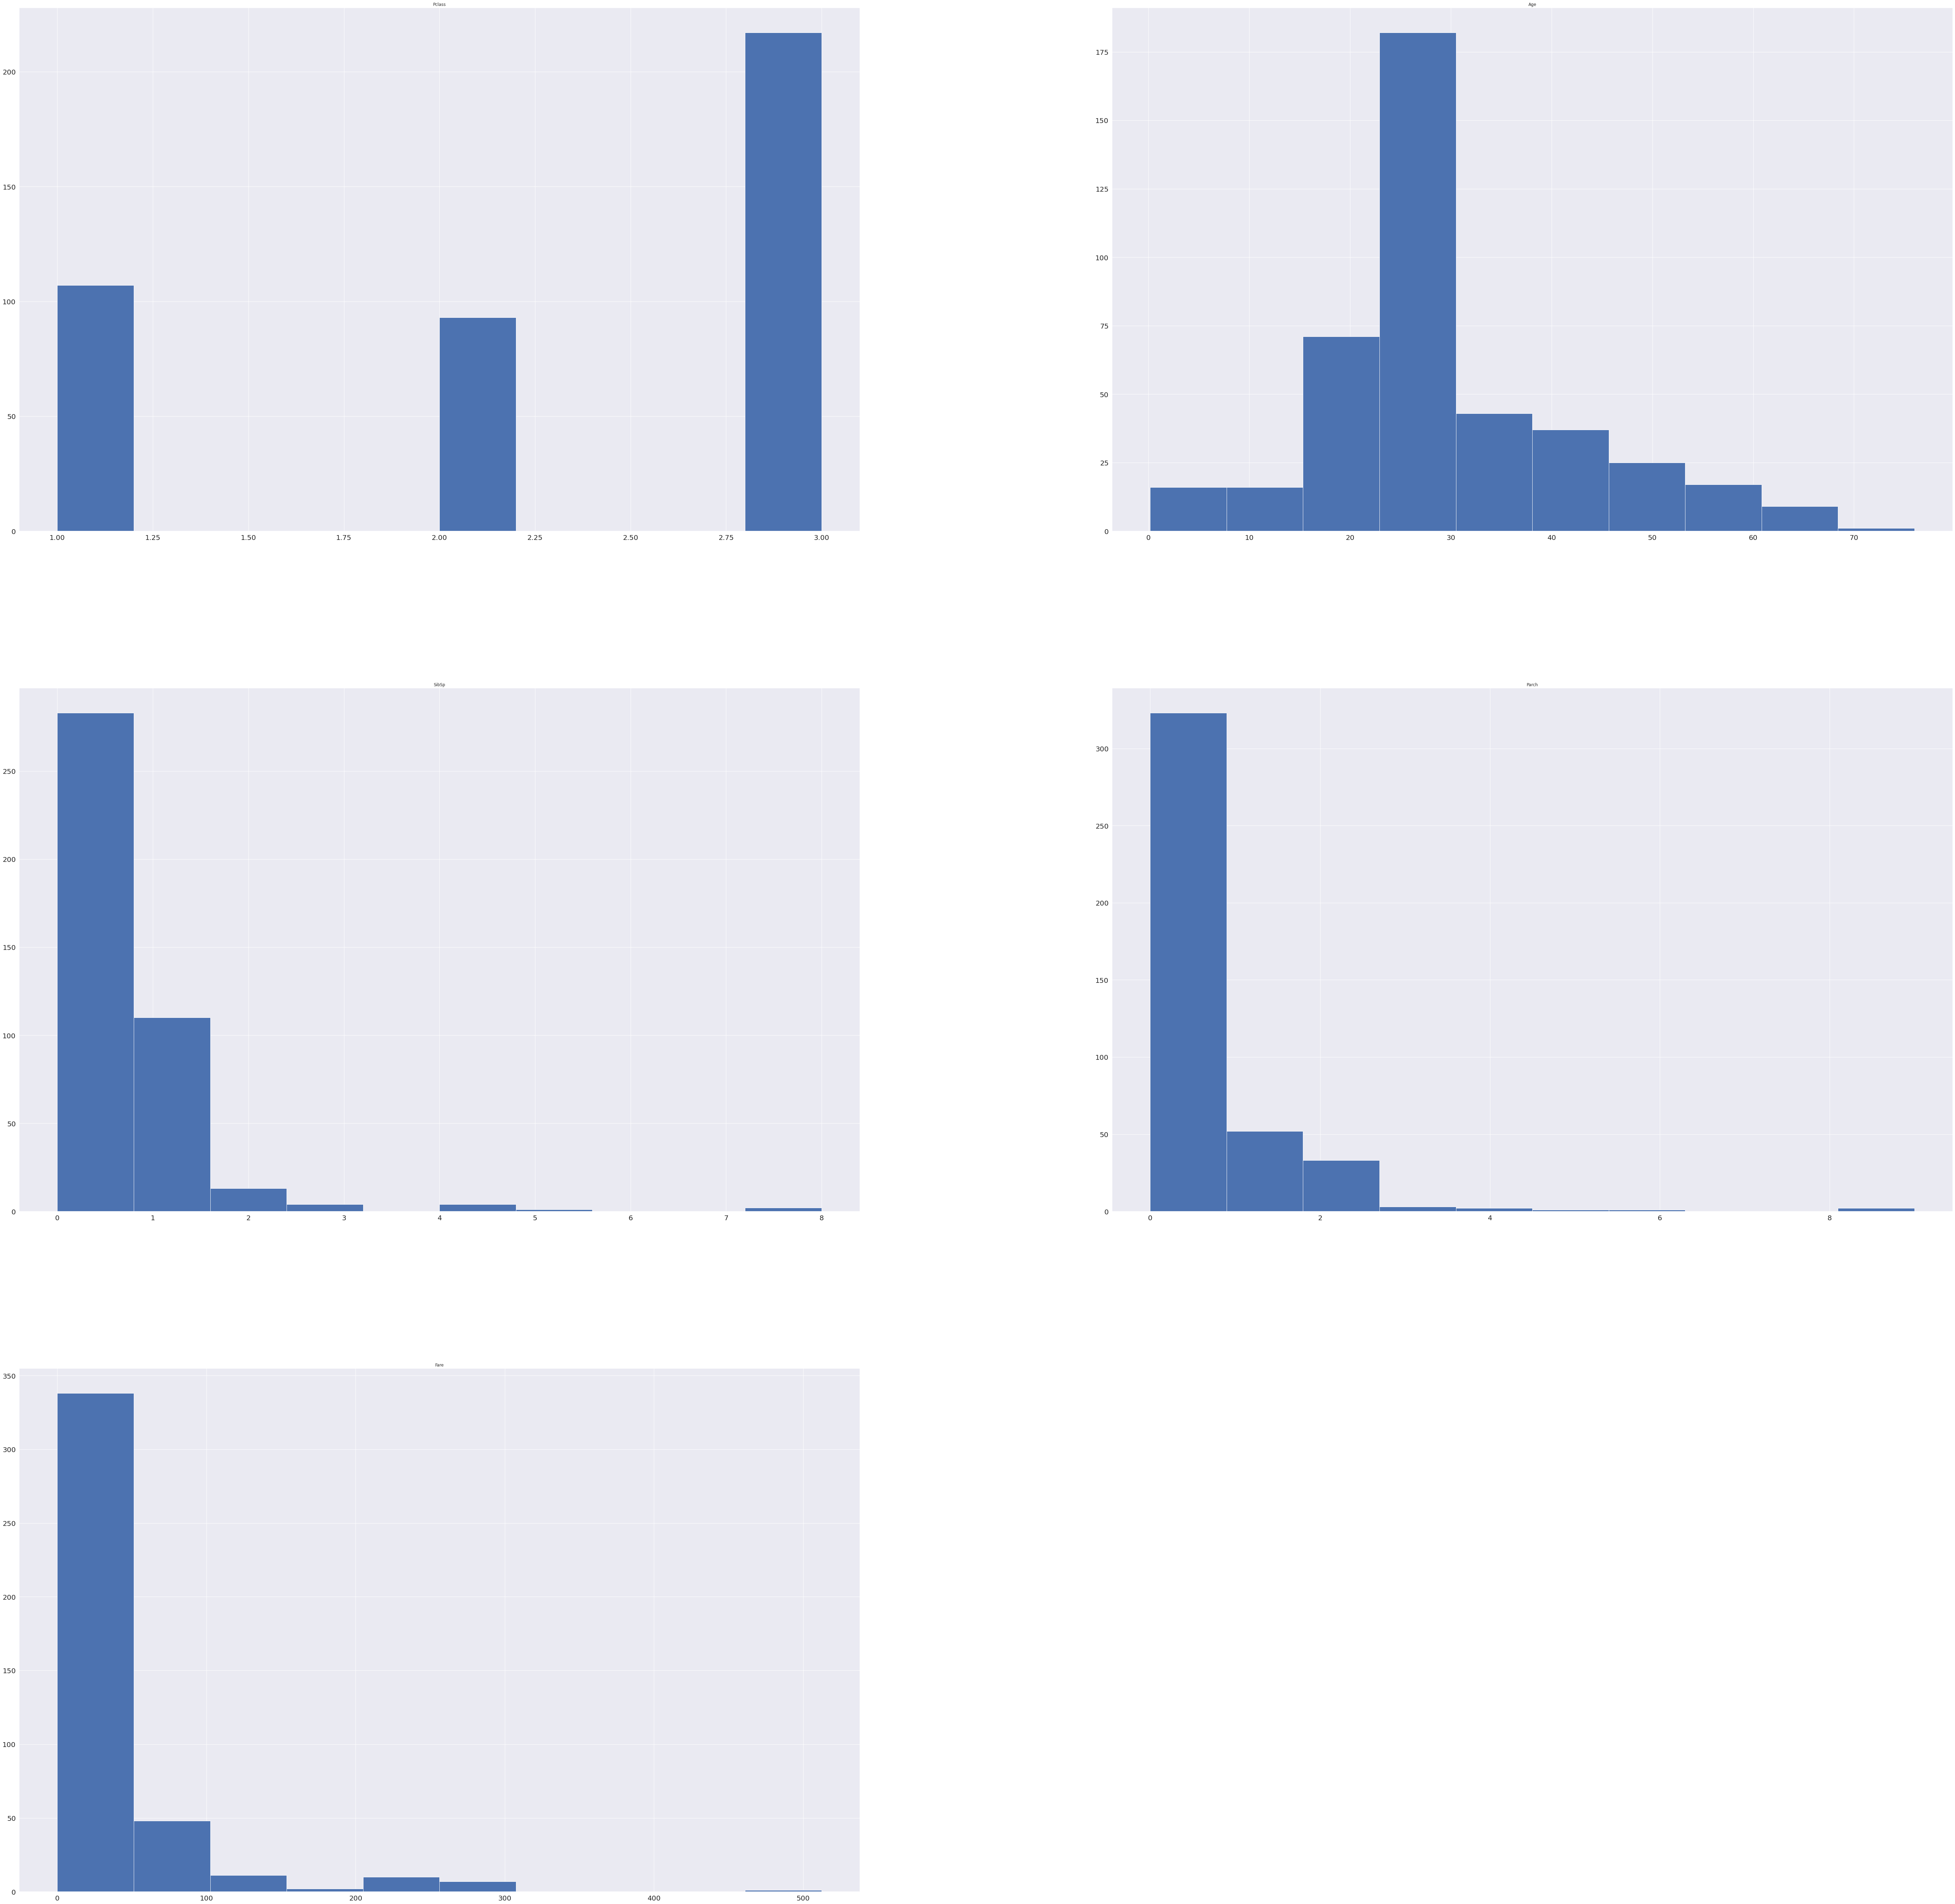

In [85]:
# histograms to show distributions
test_df2.hist(figsize=(100,100), sharex=False, sharey=False, xlabelsize= 20, ylabelsize=20)
plt.show()

The distributions shown are not normally distributed. Therefore, it is necessary to do feature scaling.

## b. Bivariate Analysis

In [86]:
# Check for correlation to see how the variables influence each other
correlations = train_df2.corr()
correlations

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.333291,-0.084185,-0.036044,0.071352,0.244700
Pclass,-0.333291,1.000000,-0.335180,0.085055,0.037218,-0.551236
Age,-0.084185,-0.335180,1.000000,-0.279150,-0.185872,0.087692
SibSp,-0.036044,0.085055,-0.279150,1.000000,0.380174,0.135490
Parch,0.071352,0.037218,-0.185872,0.380174,1.000000,0.192411
Fare,0.244700,-0.551236,0.087692,0.135490,0.192411,1.000000


Fare and PClass are strongly negatively correlated. An increase in fare influences the reduction in the level of passenger class and vice versa.

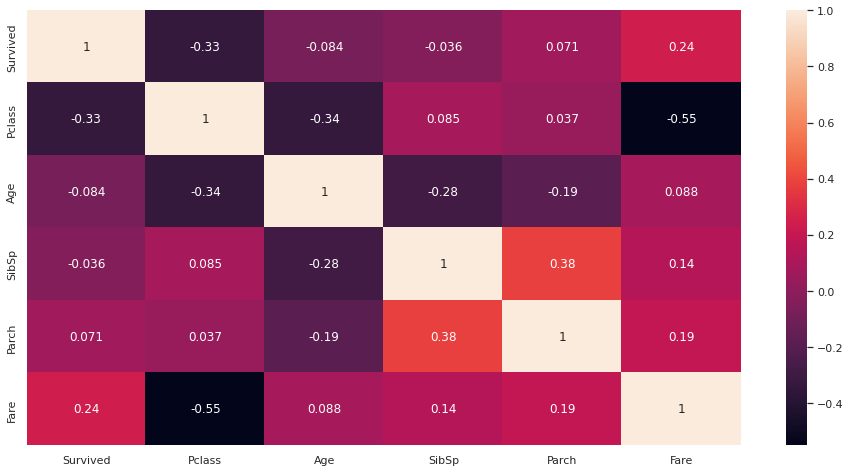

In [87]:
#correlation between variables on a heatmap

sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(correlations,xticklabels = correlations.columns, yticklabels = correlations.columns, annot=True)


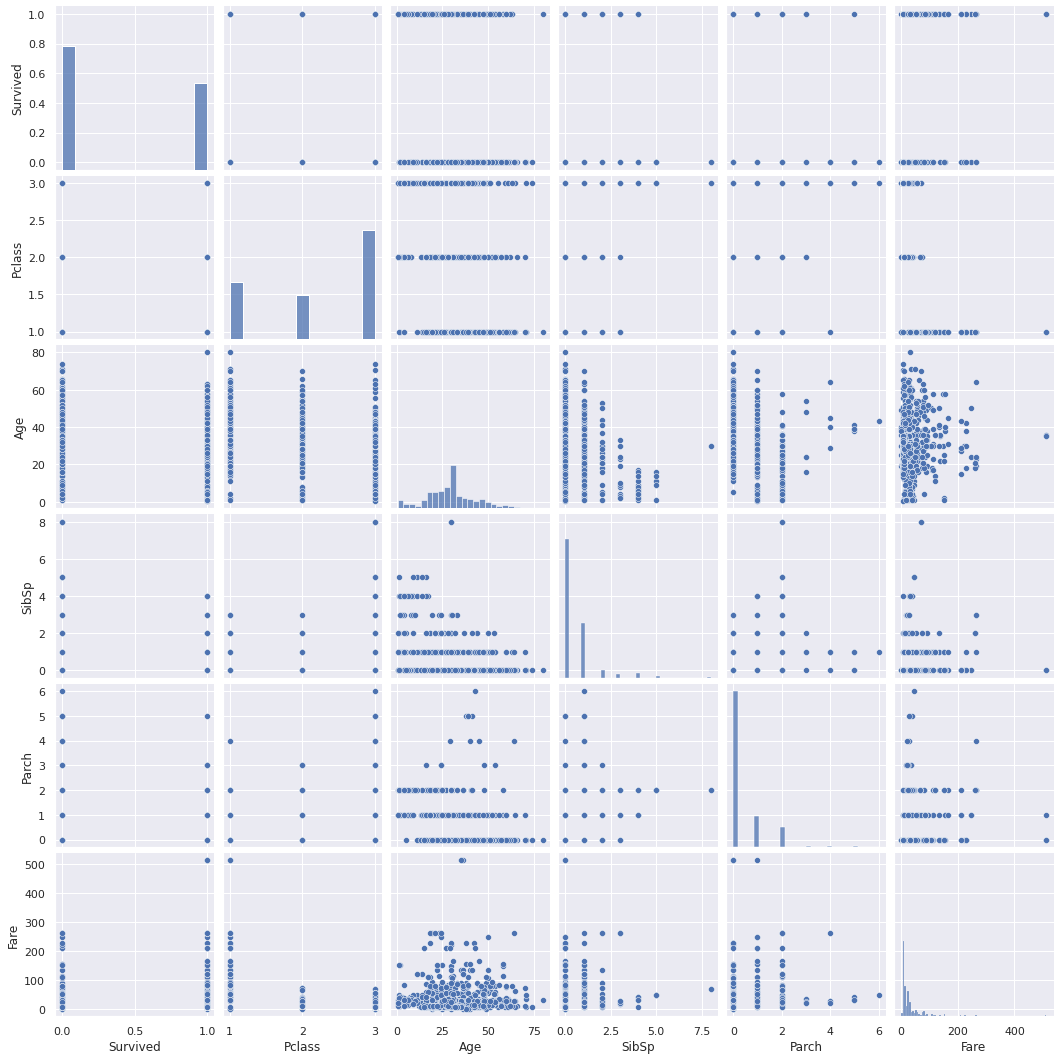

In [88]:
# Description using pairplot
sns.pairplot(train_df2)
plt.show()

pairplot visualize the above correlations. 

## c. Multivariate Analysis

Multivariate analysis is used to describe the relationship in data that cannot be handld by both univariate and bivariate analysis.
In this contest, we will use Linear Discriminant Analysis.
Linear Discriminant Analysis (LDA) is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

In [89]:
train_df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [90]:
# Converting categorical variables to a dummy indicators

Gender = pd.get_dummies(train_df2['Sex'],drop_first=True)
Gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [91]:
Embark = pd.get_dummies(train_df2['Embarked'],drop_first=True)
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [92]:
#concat 
train_df3 = pd.concat([train_df2,Gender,Embark],axis=1)
train_df3.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [93]:
train_df3.drop(['Sex', 'Embarked'],axis=1,inplace=True)
train_df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [94]:
#checking the datatypes of the dataset
train_df3.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
dtype: object

In [95]:
#changing the male column datatype
train_df3['male'] = train_df3['male'].astype(int)

In [96]:
#checking the datatypes once again
train_df3.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          int64
Q             uint8
S             uint8
dtype: object

In [97]:
# Dividing the dataset into features and labels
X = train_df3.drop('Survived', axis = 1)
y = train_df3.Survived

In [102]:
#divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [103]:

# We need to perform feature scaling
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [104]:
# Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
lda.fit(X,y)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

# Classification

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#Training the model

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
#Predict testing set
y_pred = classifier.predict(X_test)

In [108]:
#Model evaluation using classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        93
           1       0.69      0.63      0.66        63

    accuracy                           0.74       156
   macro avg       0.73      0.72      0.72       156
weighted avg       0.73      0.74      0.74       156



The accuracy score is 74% while the F1 score is further from 1. Hyperparameter tuning will help in determining a good value of k.

In [109]:
#Hyperparameters
leaf_size = list(range(1,30))
n_neighbors = list(range(1,30))

In [110]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors)

In [111]:
#classifier
classifier2 = KNeighborsClassifier()

In [121]:
clf = GridSearchCV(classifier2, hyperparameters, cv=5)

In [122]:
best_model = clf.fit(X,y)

In [123]:
# getting the best parameters for the prediction
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best n_neighbors: 22


The above parameters will b best for our prediction.

In [124]:
classifier3 = KNeighborsClassifier(leaf_size = 1,n_neighbors=22)

In [125]:
model = classifier3.fit(X,y)

In [131]:
y_pred= classifier3.predict(X_test)

ValueError: ignored

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        93
           1       0.69      0.63      0.66        63

    accuracy                           0.74       156
   macro avg       0.73      0.72      0.72       156
weighted avg       0.73      0.74      0.74       156



# CONCLUSION

To find the best value of k,it requires crossvalidation.

# **RECOMMENDATION**

Always do gridsearch for the best parameters when using the algorithm for a better model.